December 19, 2024

**Goal**: Explore the `grover-noancilla` and `grover-v-chain` circuits in mqtbench and determine why they are unsuitable for verifying with qcec.

In [1]:
cd ..

/home/abhishekabhishek/git/cpsc-513-project


In [2]:
from mqt.bench import get_benchmark
from qiskit import transpile

In [3]:
# setup the backend to transpile
from keys import IBMQ_API
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token=IBMQ_API, instance="ibm-q/open/main")
ibm_backend = service.backend("ibm_sherbrooke")

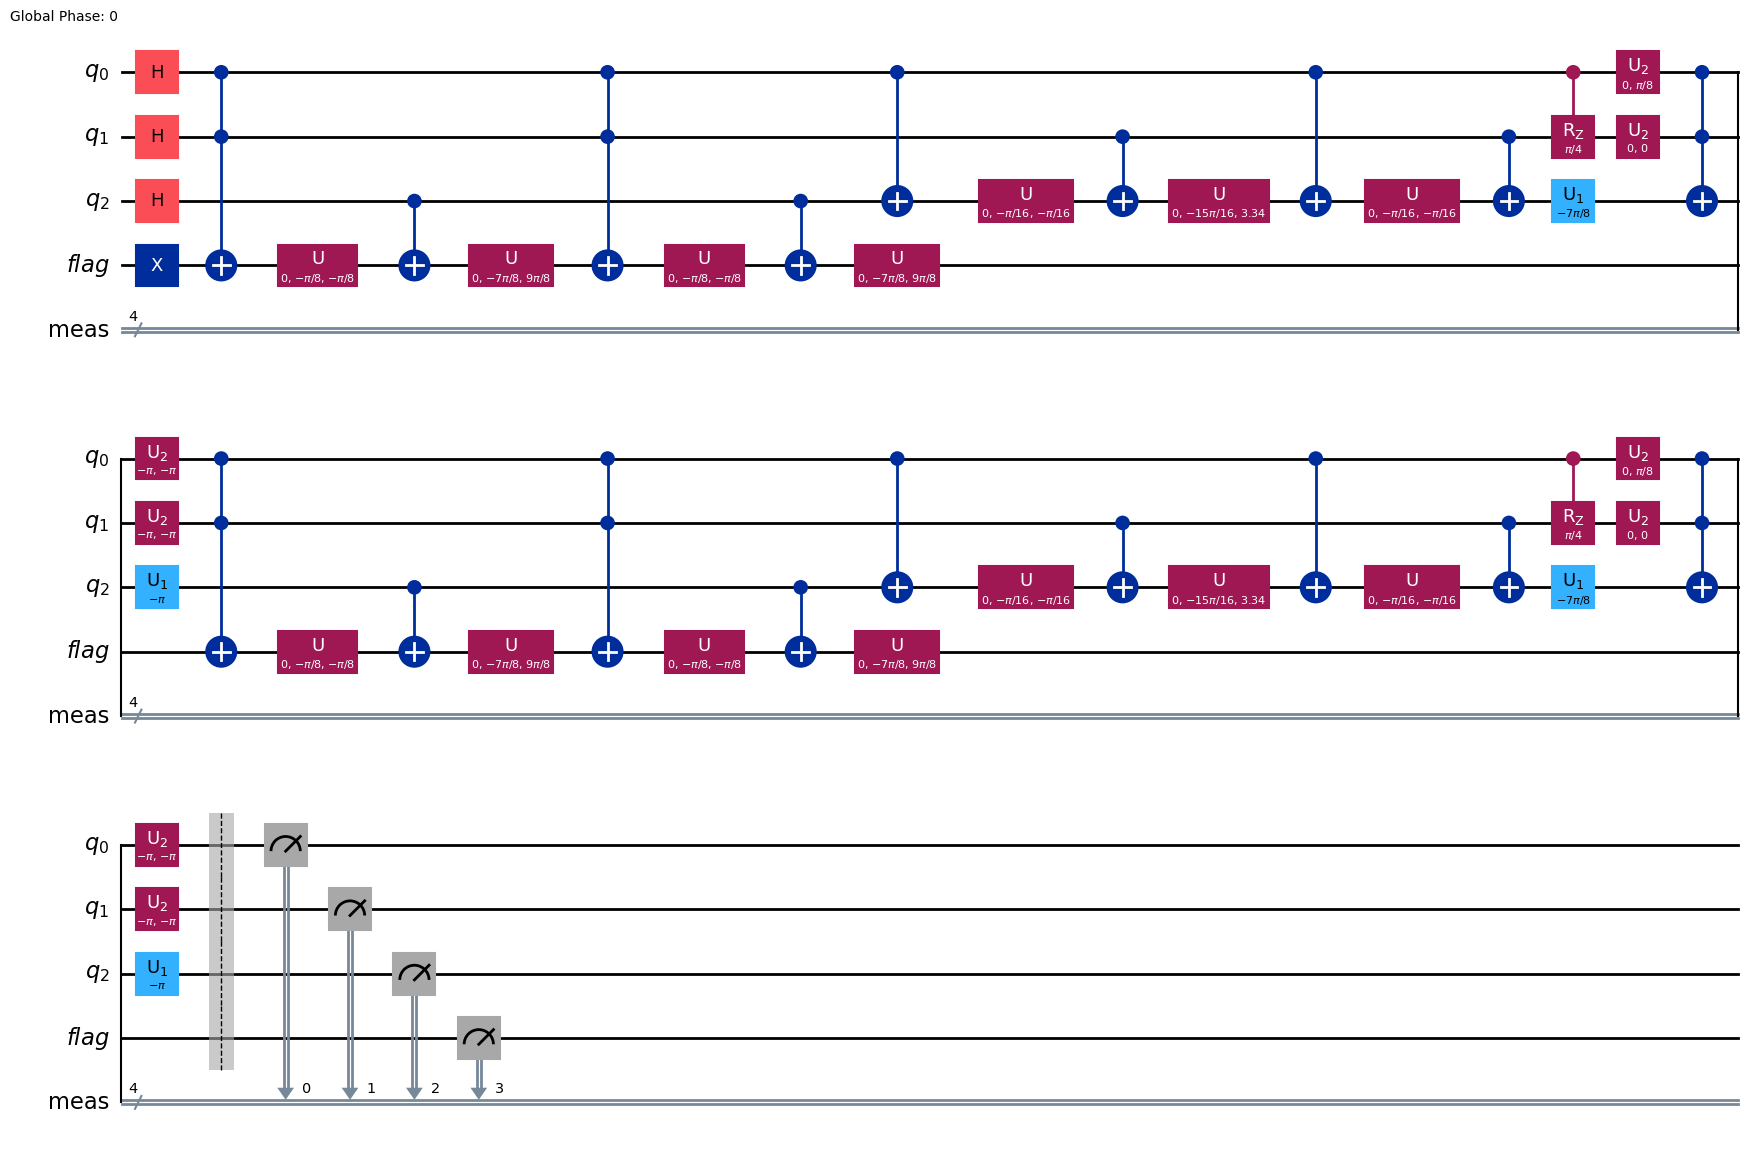

In [4]:
qc = get_benchmark('grover-noancilla', level='indep', circuit_size=4)
qc.draw(output='mpl')

In [5]:
qc.count_ops(), qc.num_qubits, qc.num_ancillas

(OrderedDict([('u', 14),
              ('cx', 12),
              ('u2', 8),
              ('ccx', 6),
              ('u1', 4),
              ('measure', 4),
              ('h', 3),
              ('crz', 2),
              ('x', 1),
              ('barrier', 1)]),
 4,
 1)

In [8]:
print(list(qc.data))

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 1),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 2),), clbits=()), CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(AncillaQubit(AncillaRegister(1, 'flag'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), AncillaQubit(AncillaRegister(1, 'flag'), 0)), clbits=()), CircuitInstruction(operation=Instruction(name='u', num_qubits=1, num_clbits=0, params=[0.0, -0.3926990816987242, -0.3926990816987242]), qubits=(AncillaQubit(AncillaRegi

Note that this is the first circuit we've seen which has `qc.num_ancillas > 0`. How does the transpilation affect the circuit?

In [6]:
qc.remove_final_measurements()
qc.measure_all()

# transpile to a HW backend
qc_hw = transpile(qc, ibm_backend)

In [7]:
qc_hw.count_ops(), qc_hw.num_qubits, qc_hw.num_ancillas

(OrderedDict([('rz', 404),
              ('sx', 244),
              ('ecr', 112),
              ('x', 11),
              ('measure', 4),
              ('barrier', 1)]),
 127,
 0)

So, we observe that we no longer have the ancilla qubits in the transpiled circuits. What happened here and is this what's causing the issue in the eq. checking? Also, do the 4 qubits include the ancilla (as the flag qubit) or not?